In [13]:
%pylab inline
import tensorflow as tf
import tensorflow_probability as tfp

Populating the interactive namespace from numpy and matplotlib


In [14]:
import tf_setCPU

## Probability distribution

In [15]:
tfd = tfp.distributions
dist = tfp.distributions.Mixture(cat=tfd.Categorical(probs=[1.,1.]),
                          components=[
                              tfd.Normal(loc=0.0,scale=1.0),
                              tfd.Normal(loc=6.0,scale=0.5),                             
                          ])
x = np.linspace(-10.,10.,5000,dtype=float)

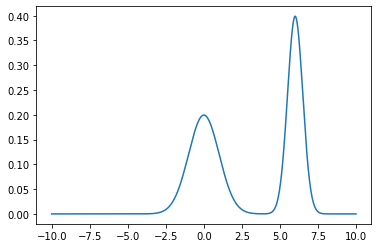

In [16]:
# plot the distribution
plot(x,dist.prob(x))

## Run Metropolis-Hastings

In [32]:
samples = tfp.mcmc.sample_chain(
  num_results=8000,
  current_state=np.float32(1),
  kernel=tfp.mcmc.RandomWalkMetropolis(dist.log_prob),
  num_burnin_steps=1000,
trace_fn=None,
  seed=1)

## Plot the time series of the "walker"

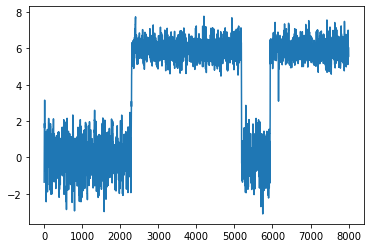

In [33]:
plt.plot(samples)

## Plot the distribution that MH arrives at

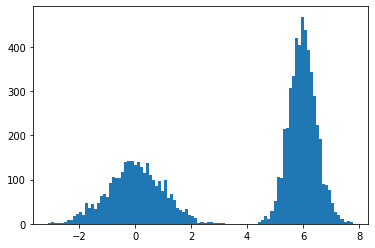

In [34]:
plt.hist(samples.numpy(),bins=100)
plt.show()